In [1]:
import os
import glob
import numpy as np
import pandas as pd

import geopandas as gpd

import rasterio
from rasterio.plot import show

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges')

In [4]:
NE_dir = os.path.join('/','media','arturo','T9','Data','shapes','Natural_Earth','NE_10m_LowReso','NE1_LR_LC_SR_W.tif')
naturalearth = rasterio.open(NE_dir)

In [5]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "REGION"})

In [6]:
dir_input = os.path.join(dir_base, 'METADATA', 'METADATA_INTENSE_NOQC_update.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(3)

,File,ISO,Region,Code,Name,Elevation,Orig_EPSG,CRS_E,CRS_N,Lat,Lon,Year_Start,Year_End,INTENSE_Resp,AGENCY,Source,TimeZone
0,IT-650_521_0060.csv,IT-650,Abruzzo,521,CASE INCILE,658.0,4326.0,4.650222e+06,371986.305502,41.993611,13.454444,2015-12-31 23:00:00,2023-12-31 23:00:00,"UK, DT",Civil Protection Abruzzo,Abruzzo,UTC
1,IT-650_537_0060.csv,IT-650,Abruzzo,537,GIULIANOVA,5.0,4326.0,4.736412e+06,414261.182915,42.775448,13.951911,2015-12-31 23:00:00,2023-12-31 23:00:00,"UK, DT",Civil Protection Abruzzo,Abruzzo,UTC
2,IT-650_536_0060.csv,IT-650,Abruzzo,536,GIOVENCO A PESCINA,733.0,4326.0,4.653877e+06,389441.933200,42.029167,13.664444,2018-05-31 23:00:00,2023-12-31 23:00:00,"UK, DT",Civil Protection Abruzzo,Abruzzo,UTC


Export figure to: /home/arturo/Downloads/figure2.png


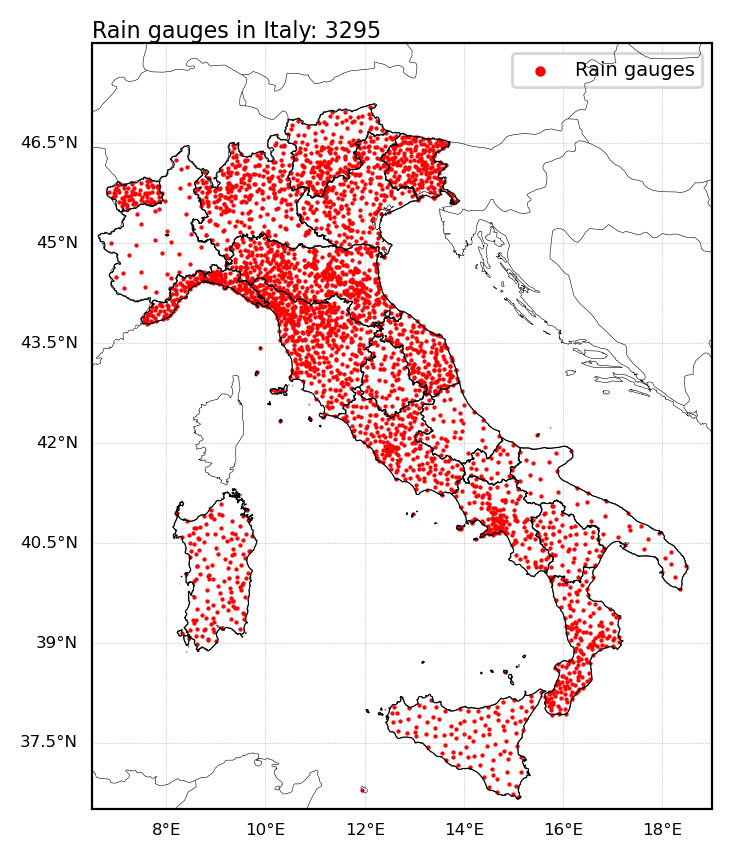

In [ ]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

ax1.set_title(f'Rain gauges in Italy: {len(METADATA)}', fontsize=8, loc='left', pad=2)

# ===========================================================================================================================================
# salida = os.path.join('/','home','arturo','Downloads','figure2.png')
# print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Export figure to: ../figures/Article_down/figure2.png


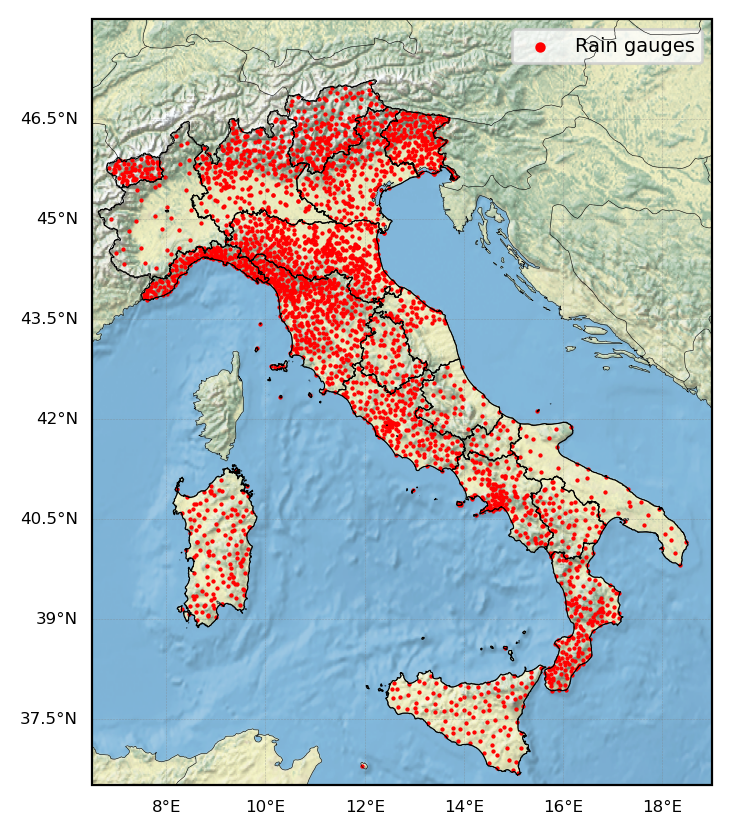

In [20]:
linewidth_map = 0.2

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,5),dpi=200)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_aspect('auto')
ax1.coastlines(linestyle='-',linewidth=linewidth_map,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=linewidth_map,edgecolor='k',zorder=10)

show(naturalearth, ax=ax1)

REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.4, zorder=10)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], c='r', s=0.3, label='Rain gauges')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

plt.legend(loc='upper right', fontsize=7, markerscale=5, frameon=True)

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','figure2.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)